
Basket option price in the Black Schole Model

Option price: 28.0444 

CI_Low=27.6313 , CI_Up=28.4575


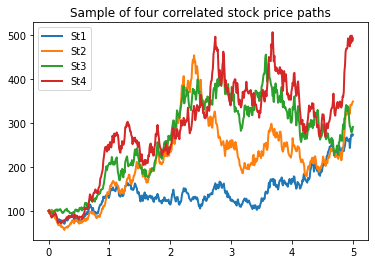

In [1]:
import numpy as np
import numpy.matlib
import scipy
import matplotlib.pyplot as plt

# Parameter set
S0_ = 100
K_ = 100
T_ = 5
r_ = 0
step_ = 500
MCrun_ = 10e4


S0         = np.float32(S0_)  # Initial stock price
K          = np.float32(K_)  # Strike price
T          = np.float32(T_)  # Option maturity in years
r          = np.float32(r_)  # Interest rate


sig = np.array( [0.4, 0.4, 0.4, 0.4], dtype=np.float32) # stock volatilities
corr = np.array([[1.0, 0.5, 0.5, 0.5],
                 [0.5, 1.0, 0.5, 0.5],
                 [0.5, 0.5, 1.0, 0.5],
                 [0.5, 0.5, 0.5 ,1.0]],dtype=np.float32)          # The correlation matrix [4 x 4]


MCrun = np.int64(MCrun_) 
step = np.int64(step_)     

 # -------------------------------------------
 # Initialization 
 # ------------------------------------------- 
    
dt = np.float32( T / np.float32(step) )                                 

St1   = np.zeros((MCrun,step+1), dtype=np.float32)   # generate paths for stock 1
St2   = np.zeros((MCrun,step+1), dtype=np.float32)   # generate paths for stock 2
St3   = np.zeros((MCrun,step+1), dtype=np.float32)   # generate paths for stock 1
St4   = np.zeros((MCrun,step+1), dtype=np.float32)   # generate paths for stock 2
 
# initialize at time 0
 
St1[:,0]  = S0
St2[:,0]  = S0
St3[:,0]  = S0
St4[:,0]  = S0
 
# Generate random numbers
 
R1 = np.float32(np.random.randn(MCrun, step))
R2 = np.float32(np.random.randn(MCrun, step))
R3 = np.float32(np.random.randn(MCrun, step))
R4 = np.float32(np.random.randn(MCrun, step))


Zero = np.zeros((MCrun), dtype=np.float32)


for j in range(0,step):
        
       L = np.linalg.cholesky(corr)
       rn = np.array([R1[:,j],R2[:,j],R3[:,j],R4[:,j]], dtype=np.float32)
     
       Rcor = L.dot(rn)
       
       dW4 = np.sqrt(dt)*Rcor.T[:,3] # correlated Brownian increments
       dW3 = np.sqrt(dt)*Rcor.T[:,2] 
       dW2 = np.sqrt(dt)*Rcor.T[:,1] 
       dW1 = np.sqrt(dt)*Rcor.T[:,0]
        
      
       St1[:,j+1] = St1[:,j]*np.exp((r-0.5*sig[0]**2)*dt+sig[0]*dW1)
       St2[:,j+1] = St2[:,j]*np.exp((r-0.5*sig[1]**2)*dt+sig[1]*dW2)
       St3[:,j+1] = St3[:,j]*np.exp((r-0.5*sig[2]**2)*dt+sig[2]*dW3)
       St4[:,j+1] = St4[:,j]*np.exp((r-0.5*sig[3]**2)*dt+sig[3]*dW4)
       

#Basket option price in the BS-model

ave = 0.25 * (St1[:,j+1] + St2[:,j+1] +  St3[:,j+1] +  St4[:,j+1])

#print(ave)

Payoff = np.fmax(ave - K, Zero)

#print(Payoff)
 
OP = np.mean(np.exp(-r*T)*Payoff) # option price
 
stdB = np.std(Payoff)
 
Low = (OP - 1.96*stdB/np.sqrt(MCrun))
Up  = (OP + 1.96*stdB/np.sqrt(MCrun))  
        
  
print('\n' "Basket option price in the Black Schole Model" '\n')


print('Option price: {:.4f}'.format(OP), '\n')


print("CI_Low={:.4f} , CI_Up={:.4f}".format(Low,Up))
   
t = np.linspace(0,5, num=step+1)
plt.plot(t, St1[1,:].T, linewidth=2, label="St1")
plt.plot(t, St2[1,:].T, linewidth=2, label="St2")
plt.plot(t, St3[1,:].T, linewidth=2, label="St3")
plt.plot(t, St4[1,:].T, linewidth=2, label="St4")
plt.legend(loc="upper left")      
plt.title('Sample of four correlated stock price paths')   
plt.show()      